# Módulo de estatística 

## Projeto A - Análise do dataset "Wine Quality"

### Instruções

- O projeto deverá ser entregue até dia 22/11 antes do início da aula
- O projeto poderá ser feito em grupo com até 4 integrantes
- Serão 2 projetos A e B porém apenas 1 projeto deverá ser entregue e escolhido pelo grupo

- A entrega deve ser feita em jupyter notebook com os códigos explícitos e comentados. Além disso os conceitos, decisões e conclusões usadas devem estar destacadas no notebook
- A entrega pode ser feita pelo class ou no repositório do git de algum dos alunos

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality
    
Obs.: juntar os arquivos de vinho branco e tinto em um único dataframe

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

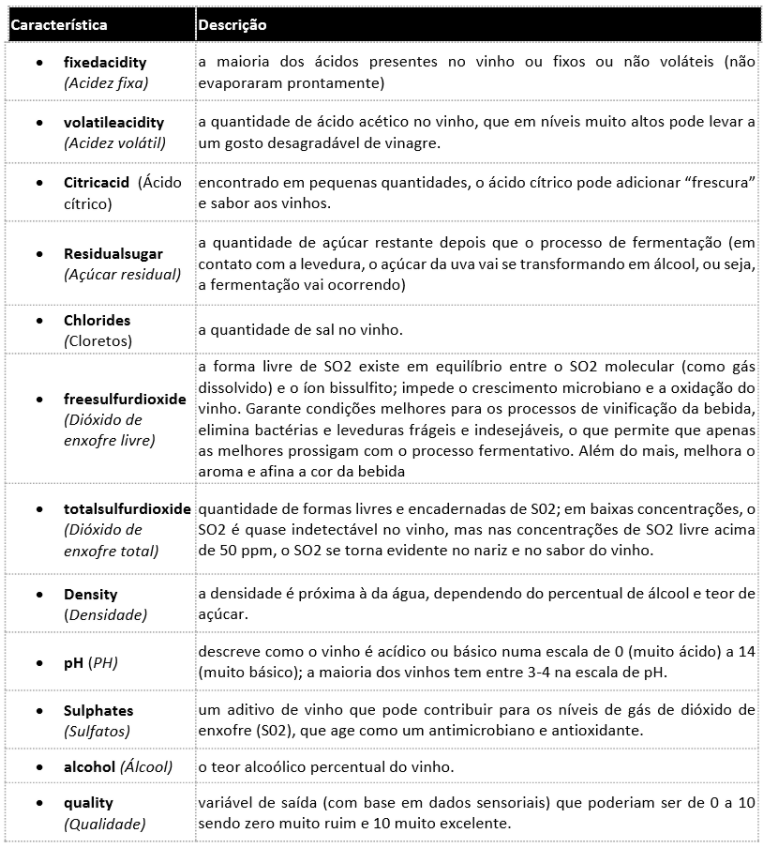

### Etapa 1

**EDA - Análise exploratória de dados**

- Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...
- Exclusão de outliers, caso necessário (sempre explicando a opção)



### Etapa 2

**Regressão Linear**

- Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Etapa 3

**Regressão logística**

- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

# Resolução

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

red['tipo'] = 'tinto'
white['tipo'] = 'branco'

In [2]:
df = pd.concat([red, white])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,branco
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,branco
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,branco
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,branco


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  tipo                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [4]:
# Verifica os valores nulos
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
tipo                    0
dtype: int64

In [5]:
# Renomeando as colunas para facilitar o entendimento das features

df.columns = ['acidez fixa', 'acidez volatil', 'acidez citrica', 'açucar residual', 'cloretos', 'dioxido de enxofre livre',
             'dioxido de enxofre total', 'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade', 'tipo']

In [6]:
# Corrigindo o index

df.reset_index(drop=True, inplace=True)
df

,acidez fixa,acidez volatil,acidez citrica,açucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,branco
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,branco
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,branco
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,branco


In [7]:
# Analisando médias, medianas, min, max 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
acidez fixa,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
acidez volatil,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
acidez citrica,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
açucar residual,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
cloretos,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
dioxido de enxofre livre,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
dioxido de enxofre total,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
densidade,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulfatos,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


Text(0.5, 1.0, 'qualidade')

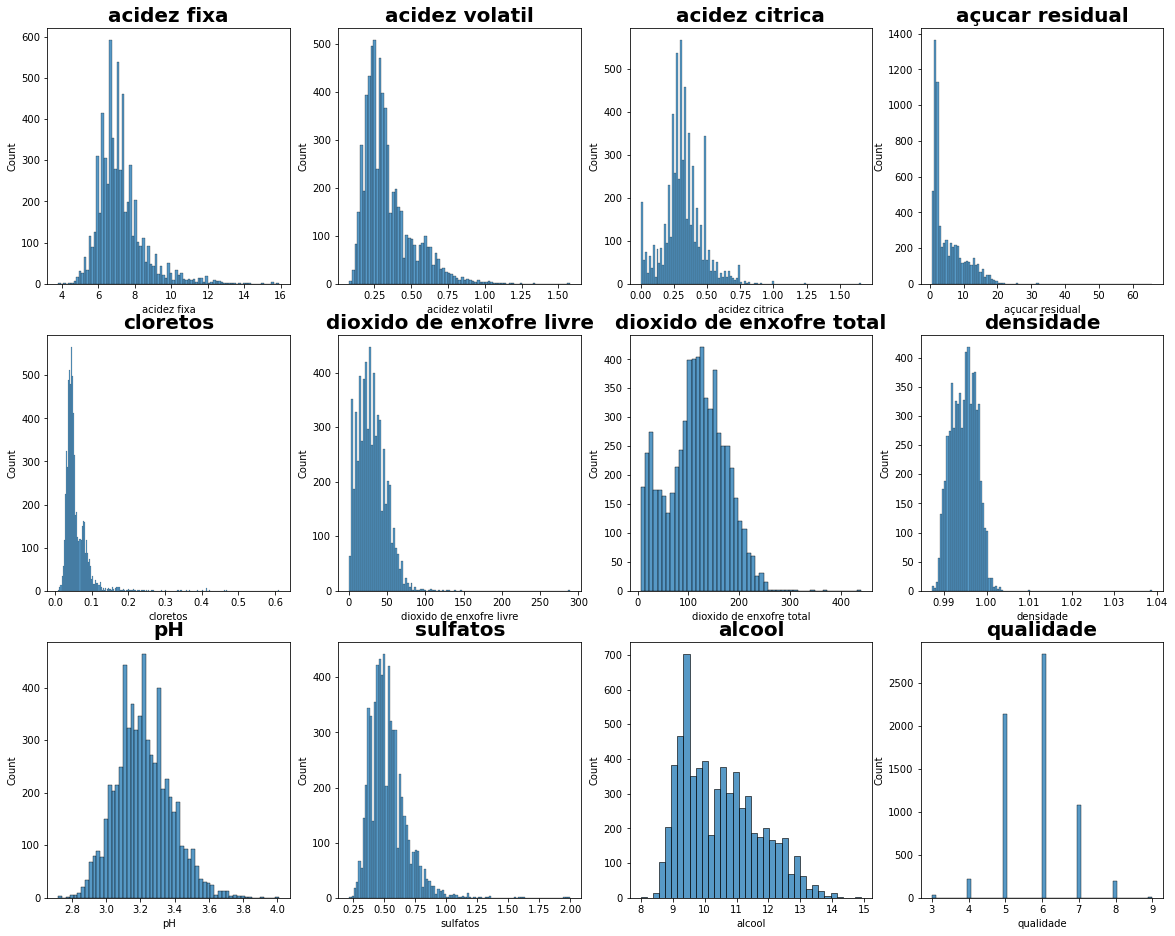

In [8]:
# Gráfico de histograma por coluna

fig, axs = plt.subplots(3,4,figsize=(20,16))
sns.histplot(ax=axs[0, 0],x=df['acidez fixa'])
sns.histplot(ax=axs[0, 1],x=df['acidez volatil'])
sns.histplot(ax=axs[0, 2],x=df['acidez citrica'])
sns.histplot(ax=axs[0, 3],x=df['açucar residual'])
sns.histplot(ax=axs[1, 0],x=df['cloretos'])
sns.histplot(ax=axs[1, 1],x=df['dioxido de enxofre livre'])
sns.histplot(ax=axs[1, 2],x=df['dioxido de enxofre total'])
sns.histplot(ax=axs[1, 3],x=df['densidade'])
sns.histplot(ax=axs[2, 0],x=df['pH'])
sns.histplot(ax=axs[2, 1],x=df['sulfatos'])
sns.histplot(ax=axs[2, 2],x=df['alcool'])
sns.histplot(ax=axs[2, 3],x=df['qualidade'])
axs[0, 0].set_title('acidez fixa', weight='bold', size=20)
axs[0, 1].set_title('acidez volatil', weight='bold', size=20)
axs[0, 2].set_title('acidez citrica', weight='bold', size=20)
axs[0, 3].set_title('açucar residual', weight='bold', size=20)
axs[1, 0].set_title('cloretos', weight='bold', size=20)
axs[1, 1].set_title('dioxido de enxofre livre', weight='bold', size=20)
axs[1, 2].set_title('dioxido de enxofre total', weight='bold', size=20)
axs[1, 3].set_title('densidade', weight='bold', size=20)
axs[2, 0].set_title('pH', weight='bold', size=20)
axs[2, 1].set_title('sulfatos', weight='bold', size=20)
axs[2, 2].set_title('alcool', weight='bold', size=20)
axs[2, 3].set_title('qualidade', weight='bold', size=20)

Text(0.5, 1.0, 'qualidade')

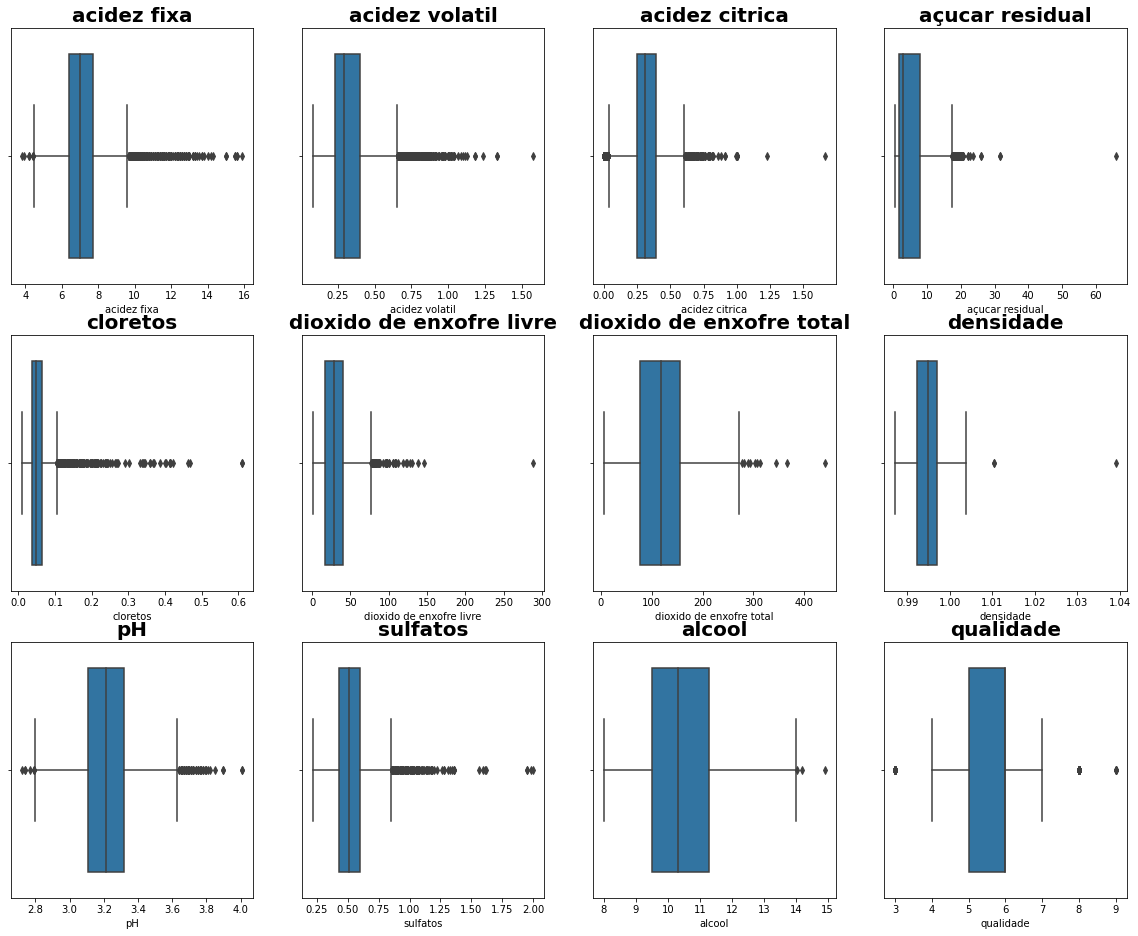

In [9]:
# Gráfico de boxplot por coluna

fig, axs = plt.subplots(3,4,figsize=(20,16))
sns.boxplot(ax=axs[0, 0],x=df['acidez fixa'])
sns.boxplot(ax=axs[0, 1],x=df['acidez volatil'])
sns.boxplot(ax=axs[0, 2],x=df['acidez citrica'])
sns.boxplot(ax=axs[0, 3],x=df['açucar residual'])
sns.boxplot(ax=axs[1, 0],x=df['cloretos'])
sns.boxplot(ax=axs[1, 1],x=df['dioxido de enxofre livre'])
sns.boxplot(ax=axs[1, 2],x=df['dioxido de enxofre total'])
sns.boxplot(ax=axs[1, 3],x=df['densidade'])
sns.boxplot(ax=axs[2, 0],x=df['pH'])
sns.boxplot(ax=axs[2, 1],x=df['sulfatos'])
sns.boxplot(ax=axs[2, 2],x=df['alcool'])
sns.boxplot(ax=axs[2, 3],x=df['qualidade'])
axs[0, 0].set_title('acidez fixa', weight='bold', size=20)
axs[0, 1].set_title('acidez volatil', weight='bold', size=20)
axs[0, 2].set_title('acidez citrica', weight='bold', size=20)
axs[0, 3].set_title('açucar residual', weight='bold', size=20)
axs[1, 0].set_title('cloretos', weight='bold', size=20)
axs[1, 1].set_title('dioxido de enxofre livre', weight='bold', size=20)
axs[1, 2].set_title('dioxido de enxofre total', weight='bold', size=20)
axs[1, 3].set_title('densidade', weight='bold', size=20)
axs[2, 0].set_title('pH', weight='bold', size=20)
axs[2, 1].set_title('sulfatos', weight='bold', size=20)
axs[2, 2].set_title('alcool', weight='bold', size=20)
axs[2, 3].set_title('qualidade', weight='bold', size=20)

<AxesSubplot:title={'center':'Mapa de calor / Medindo correlação'}>

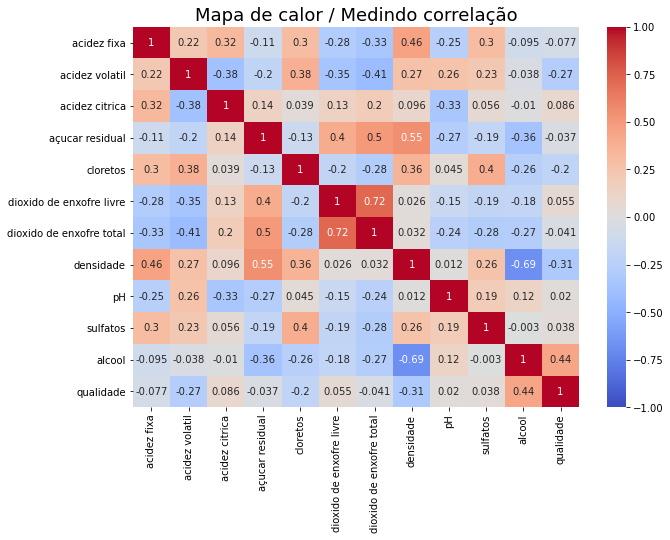

In [10]:
# Mapa de calor

plt.figure(figsize=(10,7))
plt.title("Mapa de calor / Medindo correlação", size=18)
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

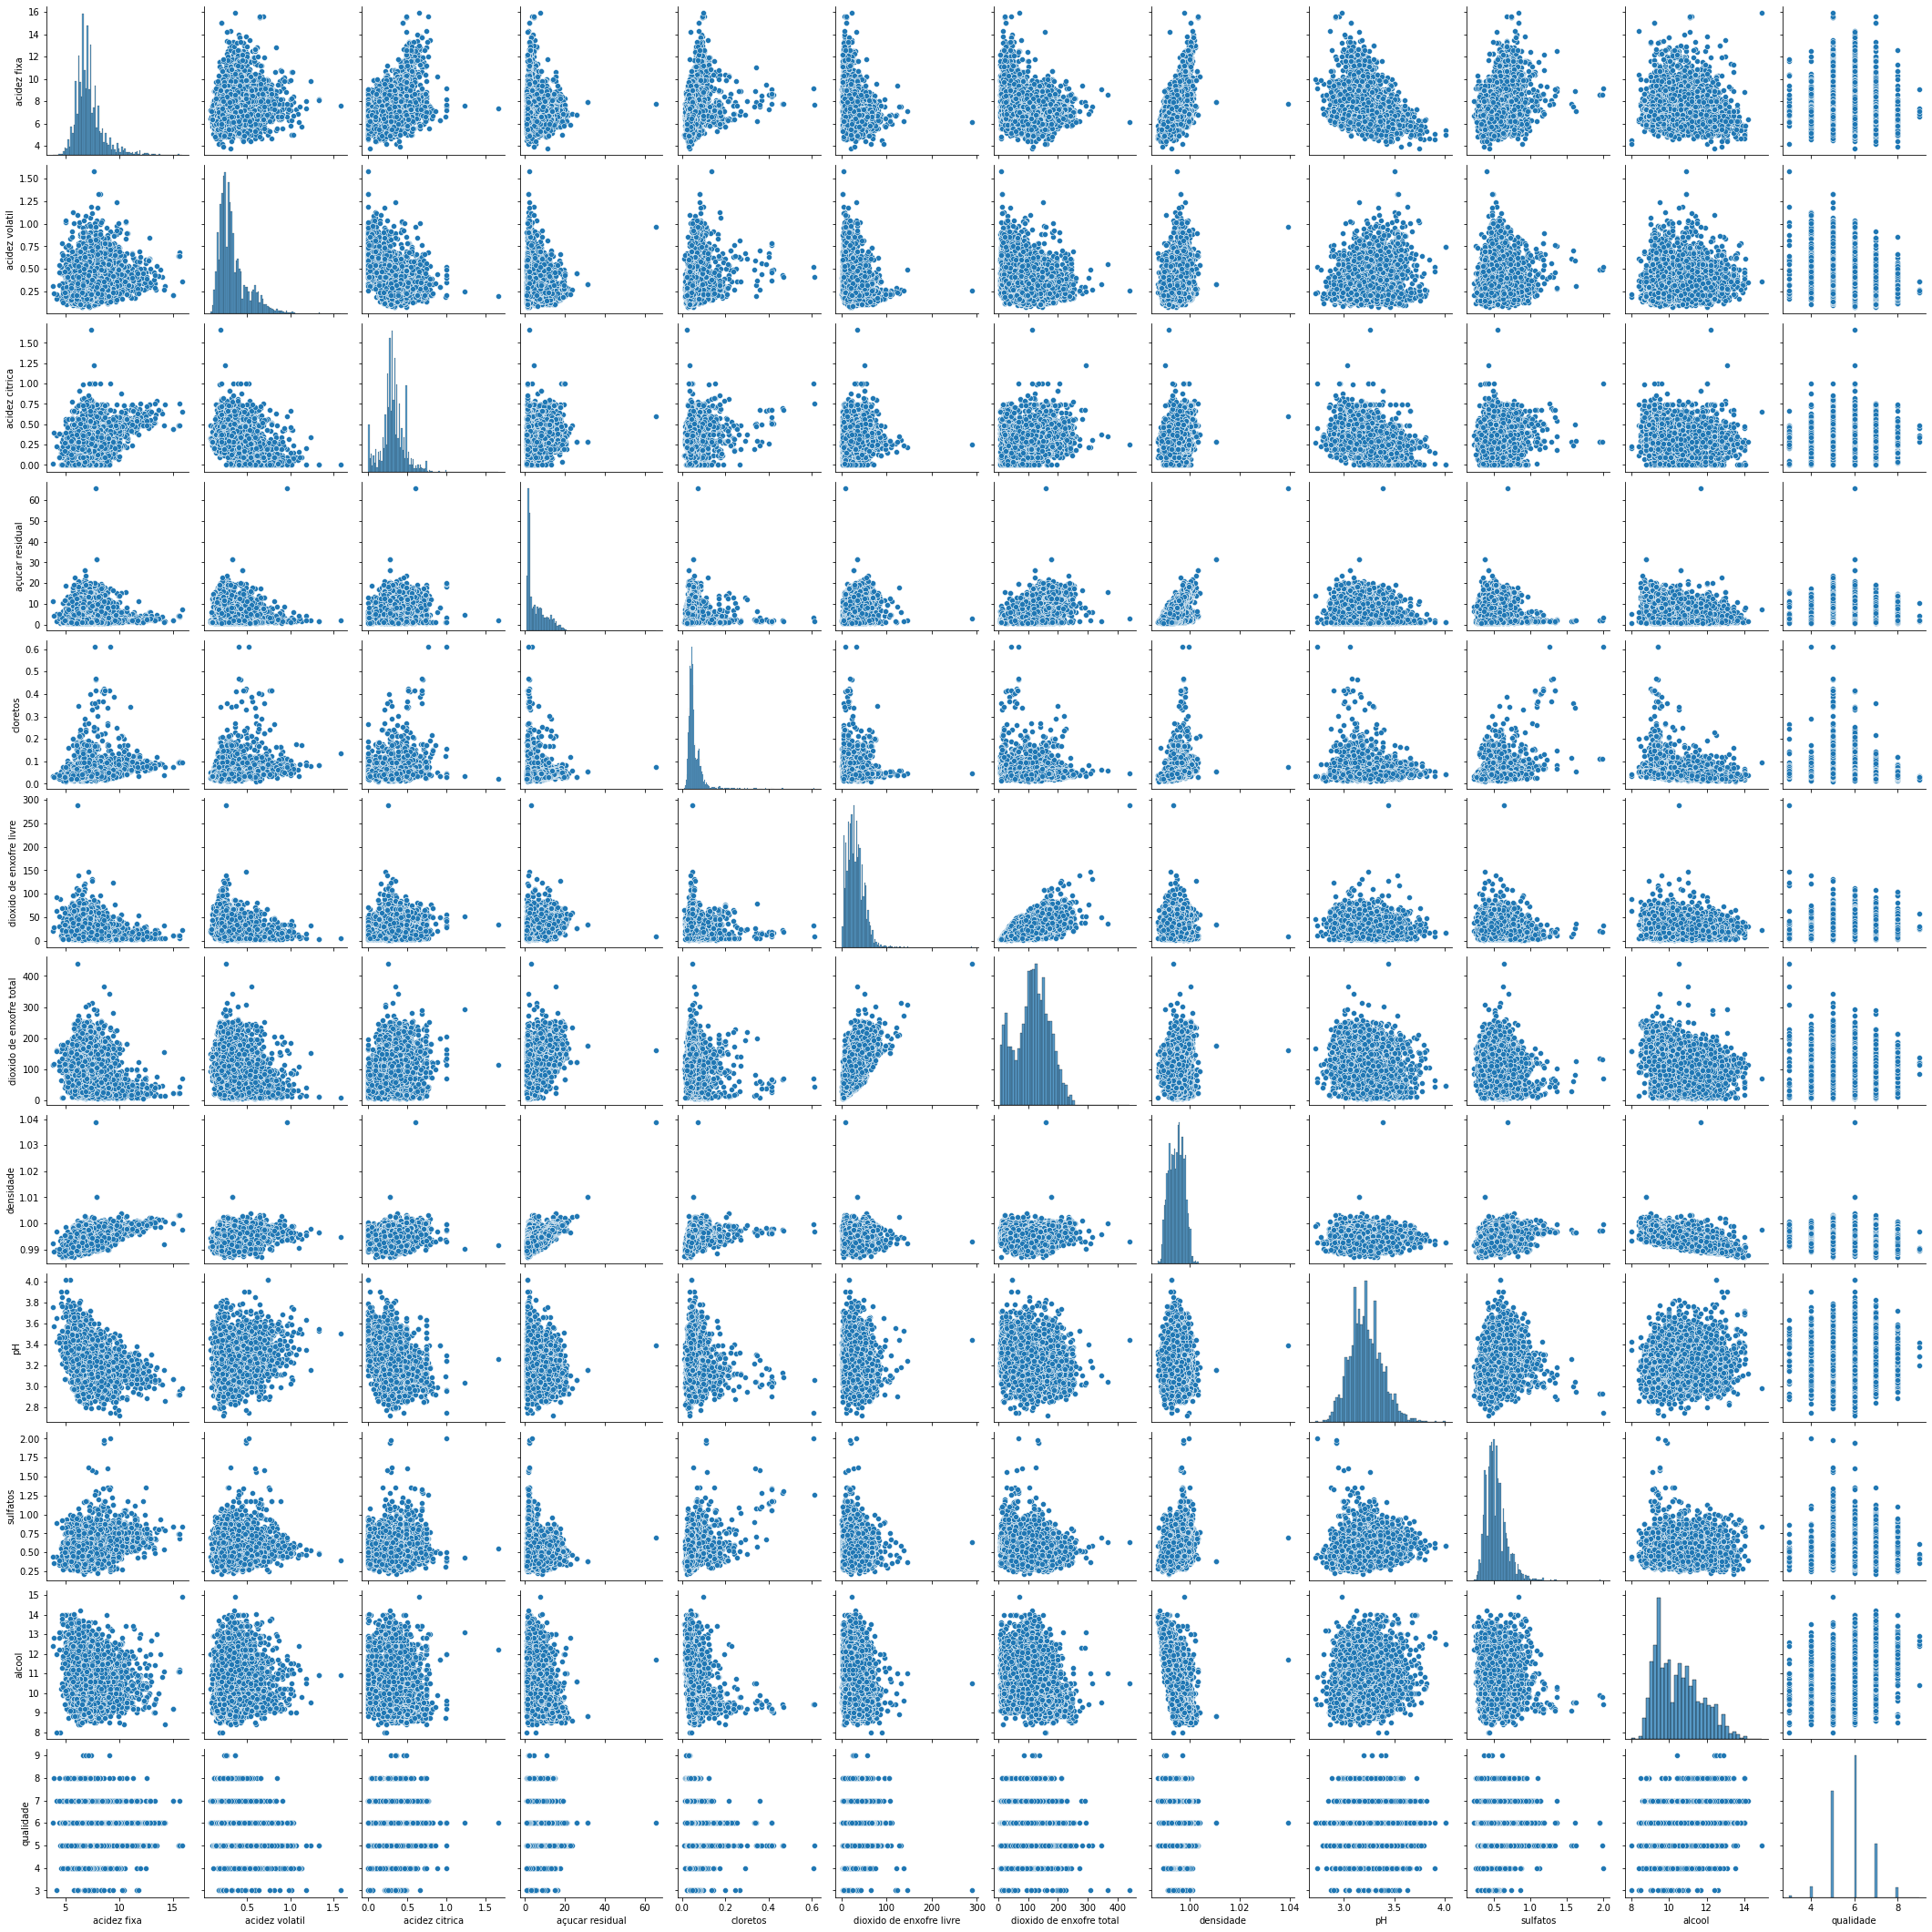

In [11]:
# Analisando as correlações
sns.pairplot(data=df)

### Observações

- Uma acidez volátil alta demais pode trazer gosto desagradavel de vinagre para o vinho
- O acido citrico em pequenas quantidades pode adicionar frescura e sabor ao vinho

##### No DataFrame abaixo verifiquei que existem bastante dados duplicados

Tomada de decisão:

- Visto que não tem porque trabalhar com dados repetidos, resolvi ficar apenas com os primeiros dados da duplicata e excluí o segundo para não trabalhar com dados que se repetem o que provavelmente deverá influenciar no nº de outliers.

In [12]:
# Codigo que verifica os dados duplicados
df[df.duplicated(keep=False)]

,acidez fixa,acidez volatil,acidez citrica,açucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,tinto
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,tinto
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,tinto
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,tinto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,branco
6454,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,branco
6455,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,branco
6478,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,branco


In [13]:
# Apagando dados duplicados, de 6497 dados baixamos para 5320
df.drop_duplicates(inplace=True)
df

,acidez fixa,acidez volatil,acidez citrica,açucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,tinto
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,tinto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,branco
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,branco
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,branco
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,branco


##### Decidi dar uma segunda olhada no gráfico de boxplot e correlação para ver o que foi alterado

   No gráfico abaixo pude perceber que ocorreu uma leve mudança no número de outlier, o que influênciou um pouco nas correlações que cada uma das features tem com a qualidade que é o nosso objetivo como por exemplo densidade e alcool.

Text(0.5, 1.0, 'qualidade')

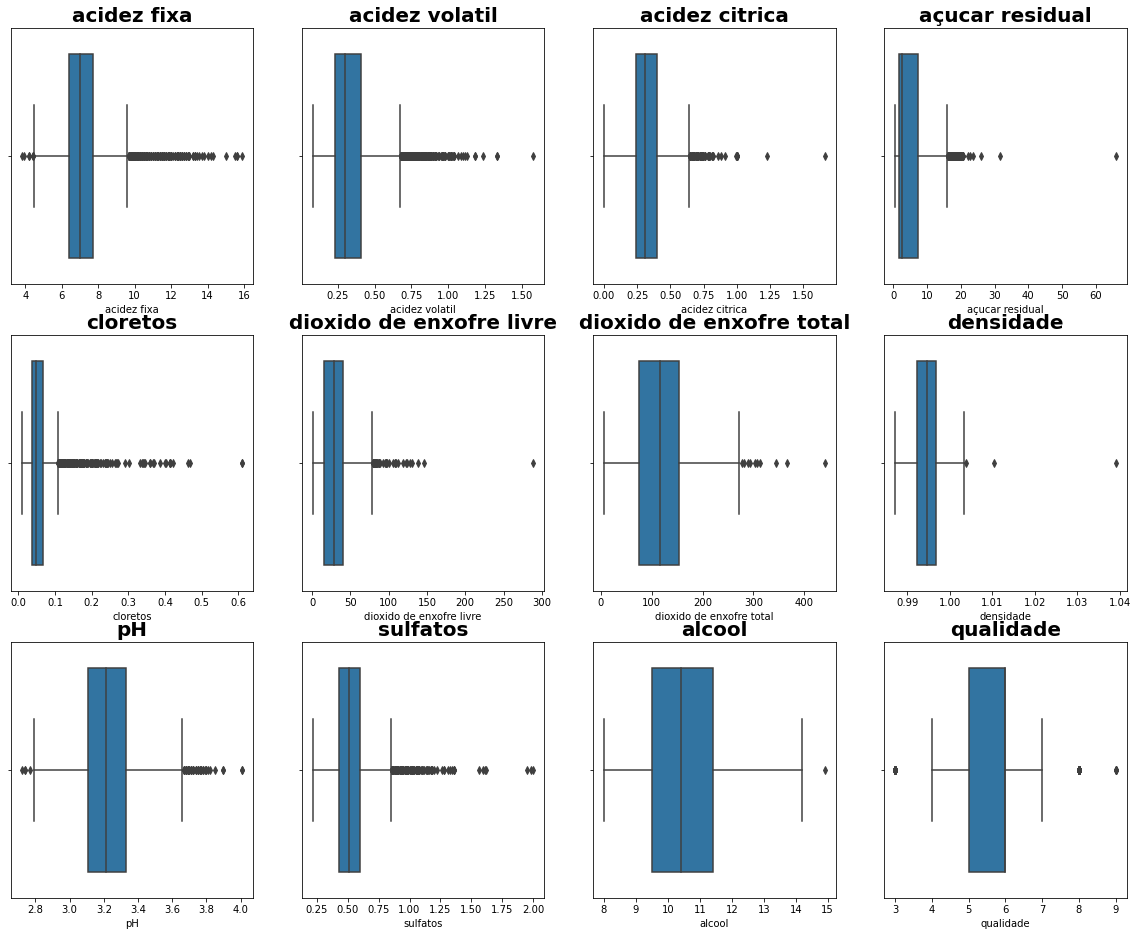

In [14]:
# Gráfico de boxplot por coluna

fig, axs = plt.subplots(3,4,figsize=(20,16))
sns.boxplot(ax=axs[0, 0],x=df['acidez fixa'])
sns.boxplot(ax=axs[0, 1],x=df['acidez volatil'])
sns.boxplot(ax=axs[0, 2],x=df['acidez citrica'])
sns.boxplot(ax=axs[0, 3],x=df['açucar residual'])
sns.boxplot(ax=axs[1, 0],x=df['cloretos'])
sns.boxplot(ax=axs[1, 1],x=df['dioxido de enxofre livre'])
sns.boxplot(ax=axs[1, 2],x=df['dioxido de enxofre total'])
sns.boxplot(ax=axs[1, 3],x=df['densidade'])
sns.boxplot(ax=axs[2, 0],x=df['pH'])
sns.boxplot(ax=axs[2, 1],x=df['sulfatos'])
sns.boxplot(ax=axs[2, 2],x=df['alcool'])
sns.boxplot(ax=axs[2, 3],x=df['qualidade'])
axs[0, 0].set_title('acidez fixa', weight='bold', size=20)
axs[0, 1].set_title('acidez volatil', weight='bold', size=20)
axs[0, 2].set_title('acidez citrica', weight='bold', size=20)
axs[0, 3].set_title('açucar residual', weight='bold', size=20)
axs[1, 0].set_title('cloretos', weight='bold', size=20)
axs[1, 1].set_title('dioxido de enxofre livre', weight='bold', size=20)
axs[1, 2].set_title('dioxido de enxofre total', weight='bold', size=20)
axs[1, 3].set_title('densidade', weight='bold', size=20)
axs[2, 0].set_title('pH', weight='bold', size=20)
axs[2, 1].set_title('sulfatos', weight='bold', size=20)
axs[2, 2].set_title('alcool', weight='bold', size=20)
axs[2, 3].set_title('qualidade', weight='bold', size=20)

<AxesSubplot:title={'center':'Mapa de calor / Medindo correlação'}>

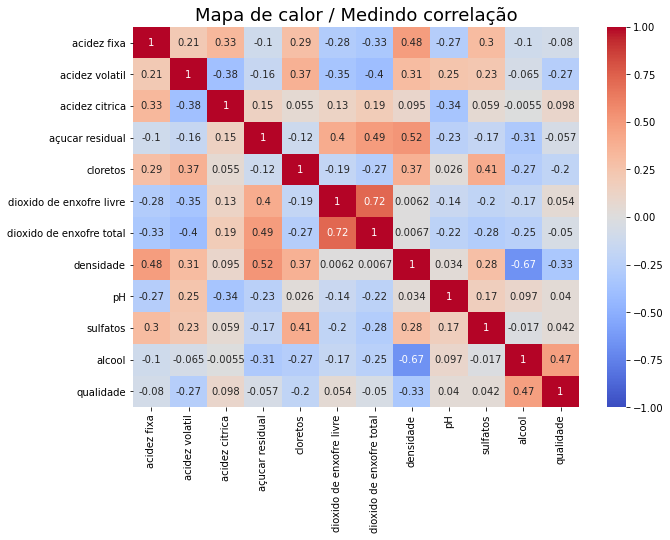

In [15]:
# Mapa de calor

plt.figure(figsize=(10,7))
plt.title("Mapa de calor / Medindo correlação", size=18)
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

### Lista de colunas que decidi remover alguns dos outliers

Na lista de colunas abaixo resolvi remover apenas os outliers mais discrepantes, pois acredito que influenciam um pouco na correlação o que vai com certeza influênciar no modelo.

As anotações abaixo são para não me confundir quando rodar a função.

- acidez volatil: remove=4 (De acordo com a descrição, está coluna se faz importante para a qualidade)
- acidez citrica: remove=2
- açucar residual: remove=1
- cloretos: remove=2
- dioxido de enxofre livre: remove=1
- densidade: remove=1 (Densidade tem um correlação boa com alcool e alcool tem uma correlação com qualidade, também me pareceu uma boa)

In [16]:
# Função que descreve o nº de outliers na coluna

def outlier_max_num(data, col):
    
    ''' Esta é uma função criada com o objetivo de contar o nº de outliers existentes em determinada coluna para que assim
    facilite a tomada de decisão de quantos outliers remover
    
    data = DataFrame
    col = coluna
    
    **OBSERVAÇÃO** está função foi criada para contar apenas o nº de outliers do limite superior, caso queira alterar para o 
    limite inferior é só fazer as alterações na formula de limite superior para inferior, variável **limit_sup** e alterar o 
    sinal da variável num_out de > para <.
    
    Ass: Leonardo do Ó
    '''
    
    # Calculando o limite superior
    df_limit = data.describe() # através do .describe() encontrei os quartis
    q3 = df_limit[col][6]
    q1 = df_limit[col][4]
    limit_sup = q3 + 1.5*(q3 - q1) # Este é o limite superior
    
#     data = data[col].sort_values(ascending=False)
    num_out = len(data.loc[data[col] > limit_sup])
    return limit_sup, num_out

var1 = outlier_max_num(data=df, col='acidez fixa')
print(f'acidez fixa Limite superior: {var1[0]}, Nº de outliers: {var1[1]}')

var2 = outlier_max_num(data=df, col='acidez volatil')
print(f'\nacidez volatil Limite superior: {var2[0]}, Nº de outliers: {var2[1]}')

var3 = outlier_max_num(data=df, col='acidez citrica')
print(f'\nacidez citrica Limite superior: {var3[0]}, Nº de outliers: {var3[1]}')

var4 = outlier_max_num(data=df, col='açucar residual')
print(f'\naçucar residual Limite superior: {var4[0]}, Nº de outliers: {var4[1]}')

var5 = outlier_max_num(data=df, col='cloretos')
print(f'\ncloretos Limite superior: {var5[0]}, Nº de outliers: {var5[1]}')

var6 = outlier_max_num(data=df, col='dioxido de enxofre livre')
print(f'\ndioxido de enxofre livre Limite superior: {var6[0]}, Nº de outliers: {var6[1]}')

var7 = outlier_max_num(data=df, col='dioxido de enxofre total')
print(f'\ndioxido de enxofre total Limite superior: {var7[0]}, Nº de outliers: {var7[1]}')

var8 = outlier_max_num(data=df, col='densidade')
print(f'\ndensidade Limite superior: {var8[0]}, Nº de outliers: {var8[1]}')

var9 = outlier_max_num(data=df, col='pH')
print(f'\npH Limite superior: {var9[0]}, Nº de outliers: {var9[1]}')

var10 = outlier_max_num(data=df, col='sulfatos')
print(f'\nsulfatos Limite superior: {var10[0]}, Nº de outliers: {var10[1]}')

var11 = outlier_max_num(data=df, col='alcool')
print(f'\nalcool Limite superior: {var11[0]}, Nº de outliers: {var11[1]}')

acidez fixa Limite superior: 9.65, Nº de outliers: 297

acidez volatil Limite superior: 0.6799999999999999, Nº de outliers: 279

acidez citrica Limite superior: 0.6400000000000001, Nº de outliers: 143

açucar residual Limite superior: 16.05, Nº de outliers: 141

cloretos Limite superior: 0.10800000000000001, Nº de outliers: 237

dioxido de enxofre livre Limite superior: 78.5, Nº de outliers: 44

dioxido de enxofre total Limite superior: 272.125, Nº de outliers: 10

densidade Limite superior: 1.0036250000000002, Nº de outliers: 3

pH Limite superior: 3.66, Nº de outliers: 45

sulfatos Limite superior: 0.855, Nº de outliers: 163

alcool Limite superior: 14.25, Nº de outliers: 1


In [17]:
df

,acidez fixa,acidez volatil,acidez citrica,açucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,tinto
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,tinto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,branco
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,branco
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,branco
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,branco


In [18]:
# Função criada para remoção de outliers

def outlier_max_remove(data, col, remove):
    
    ''' Esta é uma função criada para facilitar a remoção dos outliers onde 
    data = DataFrame
    col = Coluna que você quer remover os outliers
    remove = Nº de outliers que você quer remover
    
    **IMPORTANTE:** Está função foi criada para remover os outliers do limite superior, 
    caso você queira remover os outliers do limite inferior basta trocar o sinal de + pelo sinal de -
    na linha 26 da variável **limit_sup**, trocar o .max() pelo .min() nas linhas 32 e 33 e 
    alterar o sinal de > para o sinal de < na linha 34.
    
    Também vale alterar o nome das variáveis e da função para que fique coerente ;)
    
    **OBSERVAÇÃO:** Essa função não vai funcionar se o antes o index não for resetado caso o mesmo não esteja correto
    
    Divirta-se com a sua EDA
    
    Ass: Leonardo do Ó
    '''
    
    # Calculando o limite superior
    df_limit = data.describe() # através do .describe() encontrei os quartis
    q3 = df_limit[col][6]
    q1 = df_limit[col][4]
    limit_sup = q3 + 1.5*(q3 - q1) # Este é o limite superior
    
    num_dados = len(data[col].sort_values(ascending=False))
    print(f'Nº de linhas: {num_dados}') # A ideia aqui é fazer uma comparação do nº de linhas anterior com o nº atual 

    for i in range(1, remove + 1):# coloquei o +1 porque decidi começar do 1 para caso aja um erro na escolha do remove
        num_index = data[data[col] == data[col].max()].index[0]
        num_out = data[col].max()
        if num_out > limit_sup: # se o num_out for maior que o limite superior então é um outlier
            data = data.drop(num_index) # remove 
        else:
            print(f'Não é um outlier. Nº do remove {i}')# Ocasião em que você escolheu um nº maior que o nº de outliers
    print(f'Remove={remove}')
    return data
df = outlier_max_remove(df, col='acidez fixa', remove=17)
df = outlier_max_remove(df, col='acidez volatil', remove=9)
df = outlier_max_remove(df, col='acidez citrica', remove=7)
df = outlier_max_remove(df, col='açucar residual', remove=7)
df = outlier_max_remove(df, col='cloretos', remove=15)
df = outlier_max_remove(df, col='dioxido de enxofre livre', remove=4)
df = outlier_max_remove(df, col='sulfatos', remove=13)

Nº de linhas: 5320
Remove=17
Nº de linhas: 5303
Remove=9
Nº de linhas: 5294
Remove=7
Nº de linhas: 5287
Remove=7
Nº de linhas: 5280
Remove=15
Nº de linhas: 5265
Remove=4
Nº de linhas: 5261
Remove=13


##### Resolvi rodar mais uma vez o gráfico de mapa de calor para ver as o que aconteceu com as correlações entre as features

Text(0.5, 1.0, 'qualidade')

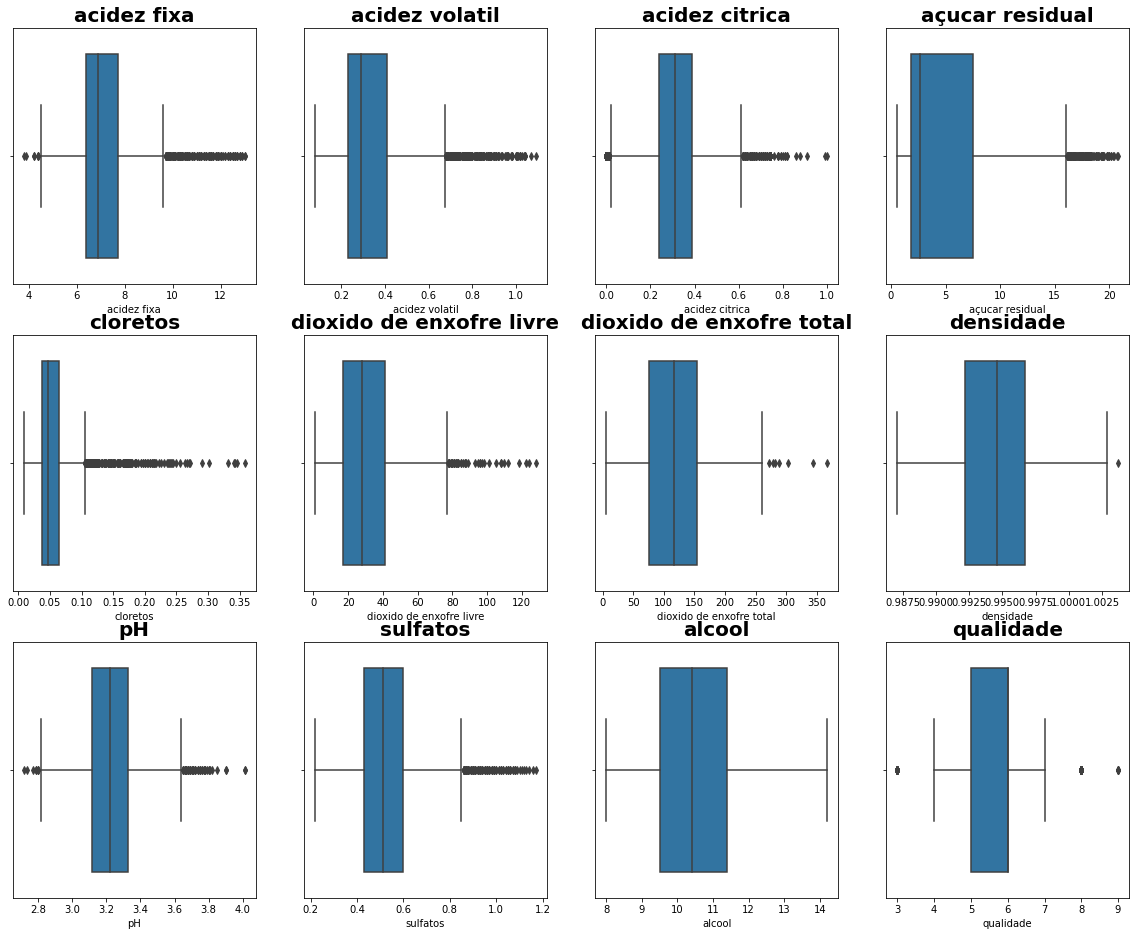

In [19]:
# Gráfico de boxplot por coluna

fig, axs = plt.subplots(3,4,figsize=(20,16))
sns.boxplot(ax=axs[0, 0],x=df['acidez fixa'])
sns.boxplot(ax=axs[0, 1],x=df['acidez volatil'])
sns.boxplot(ax=axs[0, 2],x=df['acidez citrica'])
sns.boxplot(ax=axs[0, 3],x=df['açucar residual'])
sns.boxplot(ax=axs[1, 0],x=df['cloretos'])
sns.boxplot(ax=axs[1, 1],x=df['dioxido de enxofre livre'])
sns.boxplot(ax=axs[1, 2],x=df['dioxido de enxofre total'])
sns.boxplot(ax=axs[1, 3],x=df['densidade'])
sns.boxplot(ax=axs[2, 0],x=df['pH'])
sns.boxplot(ax=axs[2, 1],x=df['sulfatos'])
sns.boxplot(ax=axs[2, 2],x=df['alcool'])
sns.boxplot(ax=axs[2, 3],x=df['qualidade'])
axs[0, 0].set_title('acidez fixa', weight='bold', size=20)
axs[0, 1].set_title('acidez volatil', weight='bold', size=20)
axs[0, 2].set_title('acidez citrica', weight='bold', size=20)
axs[0, 3].set_title('açucar residual', weight='bold', size=20)
axs[1, 0].set_title('cloretos', weight='bold', size=20)
axs[1, 1].set_title('dioxido de enxofre livre', weight='bold', size=20)
axs[1, 2].set_title('dioxido de enxofre total', weight='bold', size=20)
axs[1, 3].set_title('densidade', weight='bold', size=20)
axs[2, 0].set_title('pH', weight='bold', size=20)
axs[2, 1].set_title('sulfatos', weight='bold', size=20)
axs[2, 2].set_title('alcool', weight='bold', size=20)
axs[2, 3].set_title('qualidade', weight='bold', size=20)

<AxesSubplot:title={'center':'Mapa de calor / Medindo correlação'}>

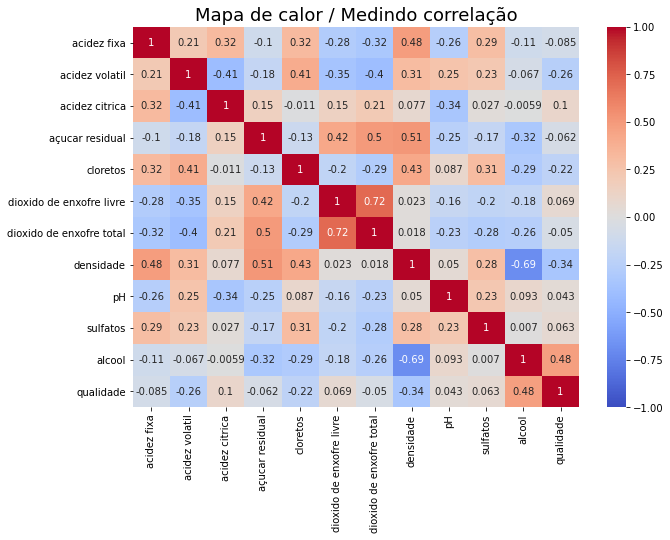

In [20]:
# Mapa de calor

plt.figure(figsize=(10,7))
plt.title("Mapa de calor / Medindo correlação", size=18)
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

##### Conclusão da EDA

Percebi que mexer nos outliers traz uma sensibilidade muito grande para os dados, o que afeta bastante na nossa correlação, logo decidi não tratar tanto assim os dados. Desde o inicio pude perceber que ao remover as duplicatas já ouve uma melhora na correlação com a qualidade e isso também afetou outras correlações entre as features. Logo decidi tirar alguns outliers que eu considerei mais importante de acordo com testes manuais que eu fiz vendo como o mapa de calor se comportava com as alterações e acredito que o melhor seja não mexer muito para que não atrapalhe tanto o nosso modelo.

- **Primeiro ponto:** escolhi as colunas com outliers mais discrepantes, ou seja, outliers que possuiam uma maior distância com os limites do boxplot;  

- **Segundo ponto:** dado a sensibilidade na hora de remover um outlier, escolhi também as colunas que tinham um número muito grande de outliers para que assim tentasse equilibrar melhor os dados, diminuindo o nº de outliers e aumentando a correlação com o target;  

- **Terceiro ponto:** Não estava nos planos perder 0,01 de corr com a acidez volátil, mas levando em consideração o que ganhamos com alcool e densidade que no gráfico de correlação nos mostra que tem um peso com a qualidade muito maior, resolvi aceitar a perda de 0,01. Visto que não foram apenas essas duas colunas, mas ouve um aumento na correlação de todas as outras colunas com o nosso target;

# Regressão Linear Multipla

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Fazendo a padronização dos dados
scaler = StandardScaler()
scaler.fit(df.drop(['qualidade', 'tipo'], axis = 1))


X = scaler.transform(df.drop(['qualidade', 'tipo'], axis = 1))
y = df['qualidade'] # Target

# Separando o modelo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Instancia o modelo
model = LinearRegression()

# Passando os dados para o modelo aprender com eles
model.fit(X_train, y_train)

# Definindo a predição para a base de teste
y_pred = model.predict(X_test)

# Ajustando os valores preditos e o que foi testado em duas variáveis
valores_pred = pd.DataFrame(y_pred, columns=['qualidade_predict'], index=y_test.index)
valores_Xtest = pd.DataFrame(X_test, columns=df.drop(['qualidade', 'tipo'], axis=1).columns, index=y_test.index)

# Criando um Dataframe com as predições e o erro
df_resultado = pd.concat([valores_Xtest, y_test, valores_pred], axis=1)
df_resultado['erro'] = df_resultado['qualidade'] - df_resultado['qualidade_predict']
df_resultado

,acidez fixa,acidez volatil,acidez citrica,açucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade,qualidade_predict,erro
1752,0.012665,-0.986146,0.659607,-0.876221,-0.242376,0.633750,-0.310189,-0.899373,-0.539053,-0.578160,-0.129792,5,5.989869,-0.989869
1809,-1.260219,-0.588784,-0.463657,1.064989,-0.777315,-1.046857,-0.825887,-0.168298,0.526417,-1.387059,-0.045362,5,5.843909,-0.843909
4862,-0.544222,-0.497086,-0.042433,-0.328114,-0.844183,0.343990,-0.399102,-1.470308,-0.037655,0.671958,1.727668,8,6.802708,1.197292
6260,0.649108,-0.680483,0.659607,-0.899059,-0.242376,0.286038,0.632293,-0.975962,-0.852426,-0.431087,0.545648,5,6.022917,-1.022917
6189,-0.623777,-0.069158,-0.112637,0.494045,-0.476412,0.691702,0.952382,-0.408508,-0.037655,-0.284014,0.461218,6,6.004103,-0.004103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,-1.021554,0.603299,-2.218757,-0.784870,-0.442978,-1.568424,-1.839500,-0.029045,1.591887,2.363293,0.967798,6,6.198623,-0.198623
2846,0.012665,-0.802748,0.168179,-0.899059,-0.309243,-0.293481,-0.612494,-0.864560,0.150369,-0.945841,0.630078,6,6.099860,-0.099860
3140,-0.066890,1.153491,-0.533861,-0.967572,-0.877617,-0.061673,-0.505798,-0.516429,-0.413703,-1.534132,-1.227383,4,4.992846,-0.992846
4674,-0.623777,-1.169543,0.589403,-0.807708,-0.442978,-0.409385,-0.488016,-1.658299,-0.727077,-0.504623,1.389948,7,6.465426,0.534574


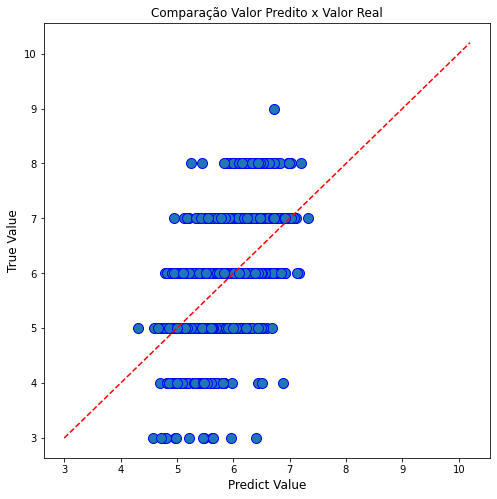

In [22]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [23]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    0.564
Erro Quadrãtico Médio:  0.531
R^2:                    0.334


In [24]:
# Variável com os coeficientes angulares obtidos
coefs = model.coef_

# Criando listas para armazenar resultados
list_columns = df.drop(['qualidade', 'tipo'], axis = 1).columns
list_feature = []
list_score = []

# Loop para armazenar 'features' e seus coeficientes
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Criando dicionário para armazenar valores das listas
dicionario = {'Features': list_feature,
              'Scores': list_score}

# Criando um DataFrame e ordenando os Scores em ordem decrescente
df_features = pd.DataFrame(dicionario)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Visualizando um DataFrame com Scores
df_features

,Features,Scores
0,alcool,0.305225
1,açucar residual,0.179985
2,dioxido de enxofre livre,0.144199
3,sulfatos,0.120715
4,acidez fixa,0.092302
5,pH,0.090909
6,acidez citrica,0.010914
7,cloretos,-0.006727
8,dioxido de enxofre total,-0.137854
9,acidez volatil,-0.173638


<AxesSubplot:xlabel='Scores', ylabel='Features'>

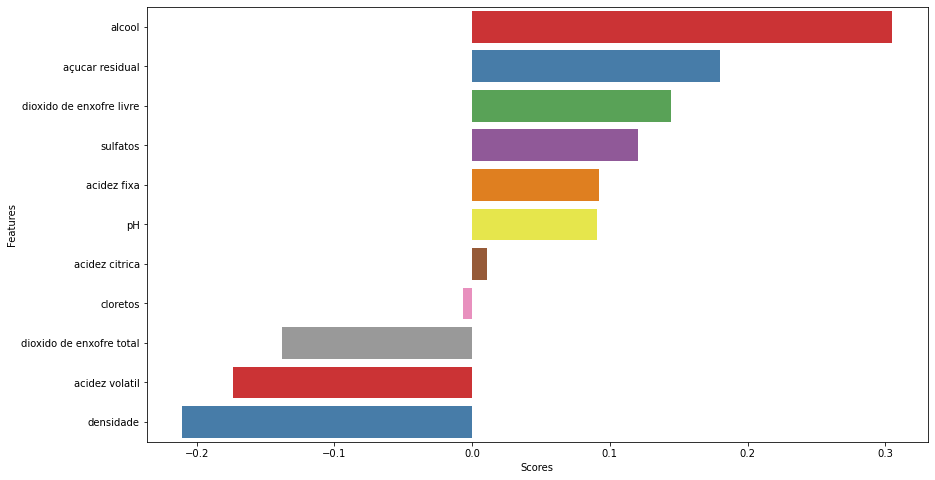

In [25]:
# Criando gráfico de barras horizontais para visualização gráfica dos valores dos 'scores'
plt.figure(figsize=(14,8))
sns.barplot(x='Scores', y='Features', data=df_features, palette='Set1')

In [26]:
# Fazendo a padronização dos dados Usando apenas as features de maior Scores
scaler = StandardScaler()
scaler.fit(df.drop(['qualidade', 'tipo',  'cloretos', 'acidez citrica'], axis = 1))

X = scaler.transform(df.drop(['qualidade', 'tipo',  'cloretos', 'acidez citrica'], axis = 1))
y = df['qualidade'] # Target

# Separando o modelo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Instancia o modelo
model_lin = LinearRegression()

# Passando os dados para o modelo aprender com eles
model_lin.fit(X_train, y_train)

# Definindo a predição para a base de teste
y_pred = model_lin.predict(X_test)

# Ajustando os valores preditos e o que foi testado em duas variáveis
valores_pred = pd.DataFrame(y_pred, columns=['qualidade_predict'], index=y_test.index)
valores_Xtest = pd.DataFrame(X_test, columns=df.drop(['qualidade', 'tipo',  'cloretos', 'acidez citrica'], axis=1).columns, index=y_test.index)

# Criando um Dataframe com as predições e o erro
df_resul_linear = pd.concat([valores_Xtest, y_test, valores_pred], axis=1)
df_resul_linear['erro'] = df_resul_linear['qualidade'] - df_resul_linear['qualidade_predict']
df_resul_linear

,acidez fixa,acidez volatil,açucar residual,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade,qualidade_predict,erro
1752,0.012665,-0.986146,-0.876221,0.633750,-0.310189,-0.899373,-0.539053,-0.578160,-0.129792,5,5.985735,-0.985735
1809,-1.260219,-0.588784,1.064989,-1.046857,-0.825887,-0.168298,0.526417,-1.387059,-0.045362,5,5.842308,-0.842308
4862,-0.544222,-0.497086,-0.328114,0.343990,-0.399102,-1.470308,-0.037655,0.671958,1.727668,8,6.802972,1.197028
6260,0.649108,-0.680483,-0.899059,0.286038,0.632293,-0.975962,-0.852426,-0.431087,0.545648,5,6.024718,-1.024718
6189,-0.623777,-0.069158,0.494045,0.691702,0.952382,-0.408508,-0.037655,-0.284014,0.461218,6,6.005305,-0.005305
...,...,...,...,...,...,...,...,...,...,...,...,...
1432,-1.021554,0.603299,-0.784870,-1.568424,-1.839500,-0.029045,1.591887,2.363293,0.967798,6,6.205603,-0.205603
2846,0.012665,-0.802748,-0.899059,-0.293481,-0.612494,-0.864560,0.150369,-0.945841,0.630078,6,6.099719,-0.099719
3140,-0.066890,1.153491,-0.967572,-0.061673,-0.505798,-0.516429,-0.413703,-1.534132,-1.227383,4,4.982090,-0.982090
4674,-0.623777,-1.169543,-0.807708,-0.409385,-0.488016,-1.658299,-0.727077,-0.504623,1.389948,7,6.463232,0.536768


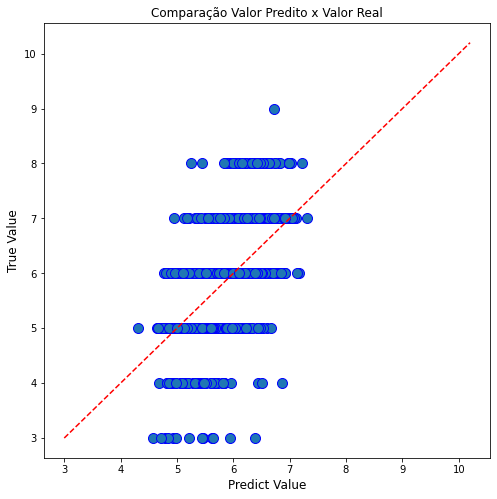

In [27]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [28]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    0.564
Erro Quadrãtico Médio:  0.531
R^2:                    0.334


### Bônus

###### Trouxe um relatório de precisão do modelo de regressão linear para a avaliação dos vinhos. (Vinhos maiores ou iguais a 6 = bom ou menor que 6 = ruim

**Lembrando** que a classificação será feita no modelo de Regressão Logística.

In [29]:
# Notas < 6
nota_me6 = list(range(3,6))
for nota in nota_me6:
    nota_real = len(df_resultado['qualidade'].loc[df_resultado['qualidade'] == nota])
    nota_pred = len(df_resultado['qualidade'].loc[(df_resultado['qualidade'] == nota) & (df_resultado['qualidade_predict'] < 6)])
    print(f'Percentual de nota {nota}: {round((nota_pred / nota_real) * 100, 2)}%')

# Notas >= 6
nota_ma6 = list(range(6,10))
for nota in nota_ma6:
    nota_real = len(df_resultado['qualidade'].loc[df_resultado['qualidade'] == nota])
    nota_pred = len(df_resultado['qualidade'].loc[(df_resultado['qualidade'] == nota) & (df_resultado['qualidade_predict'] >= 6)])
    print(f'Percentual de nota {nota}: {round((nota_pred / nota_real) * 100, 2)}%')

Percentual de nota 3: 92.31%
Percentual de nota 4: 94.55%
Percentual de nota 5: 90.21%
Percentual de nota 6: 38.77%
Percentual de nota 7: 78.39%
Percentual de nota 8: 84.09%
Percentual de nota 9: 100.0%


##### Conclusão:

- Devido a nossa base de dados ter vindo com uma correlação entre as features e o target não muito considerável, foi difícil encontrar uma boa pontuação no R2;
- Apesar de termos uma pontuação de R2 não muito boa, foi possível melhorar o modelo descartando alguns outliers e principalmente removendo as duplicatas o que aumentou a correlação de algumas features com o nosso target, como alcool, densidade, cloretos e etc;
- Com as informações fornecidas pelo cálculo de 'score', não foi possível encontrar uma boa pontuação de R2, mas como observado acima foi possível fazer uma boa avaliação dos vinhos como bom e ruim, já pensando no modelo de Regressão Logistica;

# Regressão Logística

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

df.reset_index(drop=True, inplace=True)
df.loc[df['qualidade'] >= 6, 'classifica'] = 'bom'
df.loc[df['qualidade'] < 6, 'classifica'] = 'ruim'
df

,acidez fixa,acidez volatil,acidez citrica,açucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade,tipo,classifica
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto,ruim
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,tinto,ruim
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,tinto,ruim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,tinto,bom
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,tinto,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5243,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,branco,bom
5244,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,branco,ruim
5245,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,branco,bom
5246,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,branco,bom


In [31]:
# Remove a coluna classifica da base de features
X = df.drop(['classifica','tipo', 'qualidade'], axis = 1)

# Separa o target
y = df['classifica']

# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

# Normalizando os dados de treino e teste
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Instanciando o modelo
model_log = LogisticRegression()

# Fit do Modelo
model_log.fit(X_train, y_train)

# Predições para a base de teste
y_pred = model_log.predict(X_test)
y_proba =  model_log.predict_proba(X_test)

# Ajustando os valores preditos e o que foi testado em duas variáveis
class_pred = pd.DataFrame(y_pred, columns=['qualidade_mod'], index=y_test.index)
valores_Xtest = pd.DataFrame(X_test, columns=df.drop(['classifica', 'tipo'], axis=1).columns, index=y_test.index)

#
df_resultado = pd.concat([valores_Xtest, y_test, class_pred], axis=1)

def tipo_vinho(data, data_test):
    
    ''' Esta é uma função criada para pegar todos os tipos de vinho que foram preditos.
    
    data = Dataframe inicial aonde tem a coluna que você quer incluir no resultado final
    data_test = Dataframe com o resultado dos testes
    '''
    
    data_test = data_test.index # Lista com os index dos testes
    list_df = list()
    
    # Loop criado para pegar o index do data frame test e localizar o index no data inicial para pergar o tipo do vinho
    for ind in data_test:
        list_df.append(data.loc[ind, :])
    df = pd.DataFrame(list_df)
        
    # A função retorna o df com todas as colunas, mas apenas com as linhas de teste
    return df

# Transformando a função em uma variável, pegando apenas a coluna que quero e incluindo na base de teste
tipo_vinho = tipo_vinho(df, data_test=df_resultado)
df_resultado['tipo'] = tipo_vinho['tipo']
df_resultado # Base de teste com o tipo de vinho

,acidez fixa,acidez volatil,acidez citrica,açucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade,classifica,qualidade_mod,tipo
1436,7.2,0.180,0.41,1.2,0.048,41.0,97.0,0.99190,3.14,0.45,10.4,NaN,ruim,bom,branco
1485,5.6,0.245,0.25,9.7,0.032,12.0,68.0,0.99400,3.31,0.34,10.5,NaN,ruim,bom,branco
3965,6.5,0.260,0.31,3.6,0.030,36.0,92.0,0.99026,3.22,0.62,12.6,NaN,bom,bom,branco
5050,8.0,0.230,0.41,1.1,0.048,35.0,150.0,0.99168,3.09,0.47,11.2,NaN,ruim,bom,branco
4984,6.4,0.330,0.30,7.2,0.041,42.0,168.0,0.99331,3.22,0.49,11.1,NaN,bom,bom,branco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,5.9,0.440,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,NaN,bom,bom,tinto
2354,7.2,0.210,0.34,1.1,0.046,25.0,80.0,0.99200,3.25,0.40,11.3,NaN,bom,bom,branco
2600,7.1,0.530,0.24,0.8,0.029,29.0,86.0,0.99300,3.16,0.32,9.1,NaN,ruim,ruim,branco
3819,6.4,0.150,0.40,1.5,0.042,23.0,87.0,0.98972,3.11,0.46,12.2,NaN,bom,bom,branco


**Avaliação do modelo**

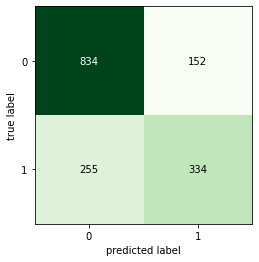

In [32]:
# Define a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Cria o plot da matriz de confusão
plot_confusion_matrix(conf_mat=cm, cmap='Greens')

# Mostra o gráfico
plt.show()

In [33]:
# Classification Report dos Resultados
print("Acurácia de treino:", model_log.score(X_train, y_train), "\n", "Acurácia de teste:", model_log.score(X_test, y_test))
print('\n',classification_report(y_test, y_pred))

Acurácia de treino: 0.7367274707323713 
 Acurácia de teste: 0.7415873015873016

               precision    recall  f1-score   support

         bom       0.77      0.85      0.80       986
        ruim       0.69      0.57      0.62       589

    accuracy                           0.74      1575
   macro avg       0.73      0.71      0.71      1575
weighted avg       0.74      0.74      0.74      1575



### Conclusão

Atráves do modelo de Regressão foi possível perceber que mesmo com correlações não muito autas entre as features e o target, no final foi possível obter um bom modelo.

No EDA foi feita a exclusão de duplicatas dado que não é interessante trabalhar com dados duplicados, pois tais dados influenciam nas médias e medianas, o que com certeza influencia no resultado do modelo. A exclusão de outliers foi feita através da análise de cada feature vendo a distância que os outliers tinham dos limites do boxplot, as distâncias mais discrepantes foram as features selecionadas para a exclusão e também as features que tinham o maior nº de outliers para que assim pudessemos equilibrar os dados.

No final consegui aumentar a correlação das features com o target e a partir dai resolvi criar o modelo. A acurácia de treino e teste foram próximas, ou seja, o modelo não se trata de um overfitting.

O modelo teve uma precisão na classificação dos vinhos bons de 77% acertando a classificação de 834 e uma precisão na classificação de vinhos ruins de 69% acertando 334, com uma acurácia de 74% no geral.